# Computergestützte Mathematik zur Analysis

Vorlesung vom 24.11.2022

&copy; 2022 Prof. Dr. Rüdiger W. Braun 

In [1]:
from sympy import *
init_printing()

# Nullstellen von Polynomen

In [2]:
x = S('x')

In [5]:
p = x**2 + 4*x - 6
glg = Eq(p, 0)
solveset(glg)

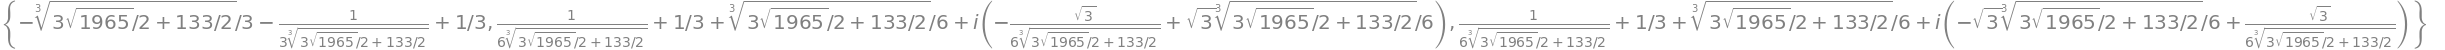

In [6]:
p = x**3 - x**2 + 5
glg = Eq(p, 0)
lsg = solveset(glg)
lsg

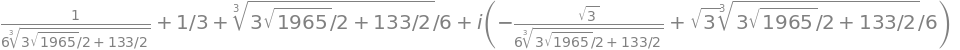

In [7]:
w = list(lsg)[1]
w

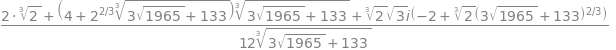

In [8]:
w.simplify()

Schöner wird's nicht

In [9]:
for w in lsg:
    display(w.n())
    print(w.is_real)

True


False


False


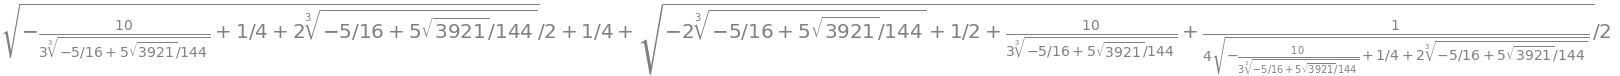

In [10]:
p2 = x**4 - x**3 - 5
glg2 = Eq(p2, 0)
lsg2 = solveset(glg2)
w = list(lsg2)[0]
w

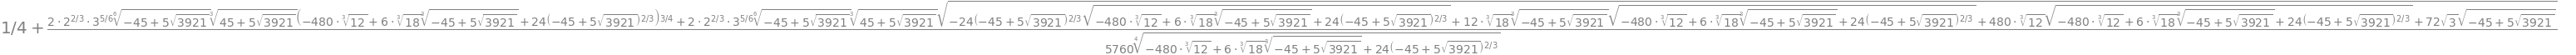

In [11]:
w.radsimp()

In [12]:
for w in lsg2:
    display(w.n())
    print(w.is_real)

True


True


False


False


In [13]:
p3 = x**5 - x**4 - 5
glg3 = Eq(p3, 0)
lsg3 = solveset(glg3)
lsg3

Galois sagt:  Geht nicht besser

In [14]:
summe = 0
for w in lsg3:
    display(w.n())
    print(w.is_real)
    summe += w
summe

True


False


False


False


False


In [15]:
summe.radsimp()

In [16]:
summe.n()

In [17]:
minimal_polynomial(summe)  

Das Minimalpolynom von $a$ ist das "kleinste" Polynom $p$ mit $p(a)=0$

# Ungleichungen

In [18]:
x = S('x')
ugl = x**2 < 5
ugl

In [19]:
solve(ugl)

In [20]:
solveset(ugl)

⎧  │         ⎛ 2    ⎞⎫
⎨x │ x ∊ ℂ ∧ ⎝x  < 5⎠⎬
⎩  │                 ⎭

In [21]:
m1 = solveset(ugl, domain=Reals)
m1

In [22]:
print(m1)

Interval.open(-sqrt(5), sqrt(5))


In [23]:
m2 = solveset(exp(x) >= E**(-1), domain=Reals)
m2

In [24]:
print(m2)

Interval(-1, oo)


In [25]:
m1 & m2

In [26]:
print(m1 & m2)

Interval.Ropen(-1, sqrt(5))


In [29]:
Interval(1, oo) == Interval.Ropen(1, oo)

True

In [30]:
Interval.open(1, oo) == Interval.Lopen(1, oo)

True

In [34]:
solveset(exp(x) > 0, domain=Reals)

In [32]:
solveset(exp(x) == 0)

In [33]:
print(_)  #  symbolische leere Menge, nicht zu verwechslen mit set()

EmptySet


In [35]:
solveset(3*log(x) < x, domain=Reals)

{x │ x ∊ ℝ ∧ (3⋅log(x) < x)}

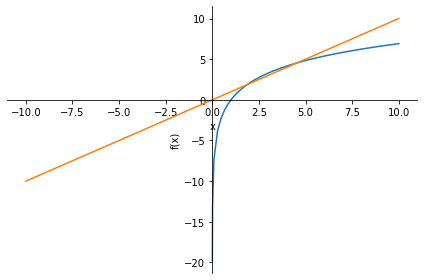

In [37]:
plot(3*log(x), x);

In [39]:
glg = Eq(3*log(x), x)
lsg = solve(glg)
lsg

`solveset` findet diese Lösungen nicht

Die Entwickler empfehlen `solveset` in den Fällen, in denen es funktioniert

# Die Lambertsche W-Funktion

In [40]:
print(lsg[0])

-3*LambertW(-1/3)


In [45]:
w = S('w')
glgW = Eq(x, w*exp(w))
glgW

In [42]:
lsg = solve(glgW, w, dict=True)
lsg

In [43]:
glgW.subs(lsg[0]).simplify()

In [44]:
glg = Eq(exp(x), 5*x**2)
lsg = solve(glg)
lsg

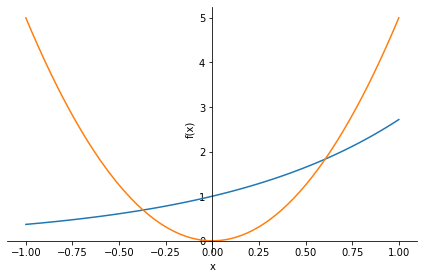

In [48]:
plot(exp(x), 5*x**2, (x, -1, 1));

# Annahmen bei Integralen

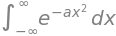

In [51]:
a = S('a')
f = exp(-a*x**2)
I1 = Integral(f, (x, -oo, oo))
I1

In [50]:
I1.doit()

⎧     √π                      π
⎪     ──       for │arg(a)│ ≤ ─
⎪     √a                      2
⎪                              
⎪∞                             
⎨⌠                             
⎪⎮       2                     
⎪⎮   -a⋅x                      
⎪⎮  ℯ      dx     otherwise    
⎪⌡                             
⎩-∞                            

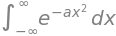

In [52]:
a = Symbol('a', positive=True)
I2 = I1.subs(S('a'), a)
I2

In [53]:
I2.doit()

# Die Argumentfunktion

In [57]:
z = exp(I*pi/2)
z

In [55]:
arg(z)

In [56]:
arg(-1), arg(1), arg(-1-I/100)

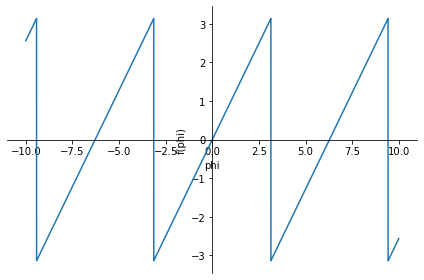

In [58]:
phi = Symbol('phi', real=True)
plot(arg(exp(I*phi)));

# Beispiel für ein Integral einer periodischen Funktion

In [61]:
f = sin(x)**2
F = Integral(f, x).doit()
F

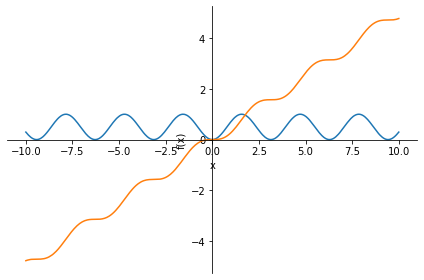

In [60]:
plot(f, F);

In [67]:
f = 1/(2-cos(x))
I2 = Integral(f, x)
I2

In [63]:
F = I2.doit()
F

In [64]:
print(F)

2*sqrt(3)*(atan(sqrt(3)*tan(x/2)) + pi*floor((x/2 - pi/2)/pi))/3


In [65]:
floor(3.5)

In [66]:
floor(-3.5)

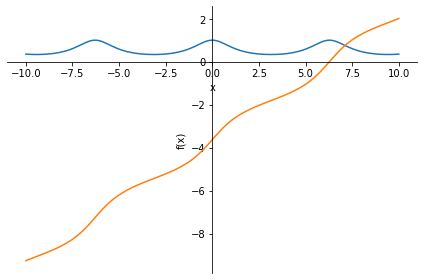

In [68]:
plot(f, F);

Wofür ist `floor` nötig?

In [69]:
g = atan(sqrt(3)*tan(x/2))
g

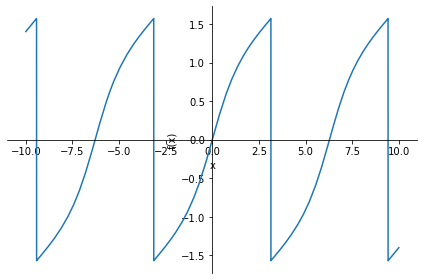

In [70]:
plot(g);

In [71]:
F.diff(x)

     ⎛   ⎛   2⎛x⎞    ⎞                  x   π⎞
     ⎜   ⎜tan ⎜─⎟    ⎟   ⎛ d       ⎞│   ─ - ─⎟
     ⎜   ⎜    ⎝2⎠   1⎟   ⎜───(⌊ξ₁⌋)⎟│   2   2⎟
     ⎜√3⋅⎜─────── + ─⎟   ⎝dξ₁      ⎠│ξ₁=─────⎟
     ⎜   ⎝   2      2⎠                    π  ⎟
2⋅√3⋅⎜──────────────── + ────────────────────⎟
     ⎜      2⎛x⎞                  2          ⎟
     ⎜ 3⋅tan ⎜─⎟ + 1                         ⎟
     ⎝       ⎝2⎠                             ⎠
──────────────────────────────────────────────
                      3                       

In [72]:
F.diff(x).simplify()

   ⎛⎛     2⎛x⎞    ⎞ ⎛ d       ⎞│              2⋅√3   ⎞
√3⋅⎜⎜3⋅tan ⎜─⎟ + 1⎟⋅⎜───(⌊ξ₁⌋)⎟│   x - π + ──────────⎟
   ⎜⎝      ⎝2⎠    ⎠ ⎝dξ₁      ⎠│ξ₁=─────   cos(x) + 1⎟
   ⎝                                2⋅π              ⎠
──────────────────────────────────────────────────────
                    ⎛     2⎛x⎞    ⎞                   
                  3⋅⎜3⋅tan ⎜─⎟ + 1⎟                   
                    ⎝      ⎝2⎠    ⎠                   

Die Sprungstellen können nicht behandelt werden

In [73]:
def null(x):
    return 0

F2 = F.replace(floor, null)
F2.diff().simplify()

`F2` ist unstetig, aber differenzierbar, wenn man die Sprünge entfernt

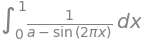

In [76]:
a = S('a')
f = 1 / (a - sin(2*pi*x))
I1 = Integral(f, (x, 0, 1))
I1

In [75]:
I1.doit()

⎧-∞   for a = -1
⎪               
⎪nan  for a = 0 
⎨               
⎪ ∞   for a = 1 
⎪               
⎩ 0   otherwise 

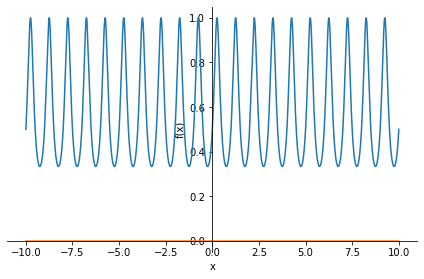

In [77]:
plot(f.subs(a, 2), 0);